# ACME Widget Failure Prediction

---

## Problem Statement

---

ACME, a widget manufacturer, would like to understand what causes failures of widgets and how these can be predicted or prevented in the future. They have provided some data extracted from their mainframe system. We will be developing binary classification models to predict failures of widgets and examine feature importances to identify strong predictors of failure. Our findings can help ACME accelerate quality issue investigations to develop failure prevention strategies. Through fewer warranty claims and quality recalls, ACME can benefit from reduced operating costs.

### Contents:
- [1. Data Collection](#1.-Data-Collection)
- [2. Data Cleaning and EDA](#2.-Data-Cleaning-and-EDA)
- [3. Pre-processing and Modeling](#3.-Pre-processing-and-Modeling)
- [4. Evaluation](#4.-Evaluation)
- [5. Conclusion and Recommendations](#5.-Conclusion-and-Recommendations)

## 1. Data Collection

---

ACME has provided some data extracted from their mainframe system.

Data summary:

- **failure**: Indicate whether the widget failed (=1) or not (=0)
- **model**: Model number of the widget
- **date**: Date in yyyy-mm-dd format
- **serial_number**: Serial number of the widget
- **17 variables that begin with 'smart'**: Values extracted from the mainframe system

## 2. Data Cleaning and EDA

---

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk', palette='Set2')
%matplotlib inline

In [2]:
# Load raw data
df = pd.read_csv('./data/modeldata.csv', sep='|', parse_dates=['date'])

In [3]:
# Print first 5 rows of data
df.head()

,failure,model,date,serial_number,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,...,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_13_raw,smart_15_raw,smart_22_raw,smart_16_raw,smart_17_raw,smart_18_raw
0,0,Hitachi HDS5C3030ALA630,2016-01-01,MJ0351YNG9Z0XA,0,108,540,14,0.0,0.000000e+00,...,27929,0,0,14,0,0,0,5,0,654690
1,0,Hitachi HDS5C3030ALA630,2016-01-01,MJ0351YNG9Z0XA,0,108,540,14,0.0,0.000000e+00,...,27929,0,0,14,0,0,0,5,0,654690
2,0,ST4000DM000,2016-01-01,Z305B2QN,54551400,0,0,4,0.0,1.112537e-308,...,411,0,0,4,0,0,0,4,0,654313
3,0,ST4000DM000,2016-01-01,Z305B2QN,54551400,0,0,4,0.0,1.112537e-308,...,411,0,0,4,0,0,0,4,0,654313
4,0,Hitachi HDS5C3030ALA630,2016-01-01,MJ0351YNG9Z7LA,0,104,566,19,0.0,0.000000e+00,...,27492,0,0,18,0,0,0,8,1,655582


In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
# Find rows with any null values
df[df.isnull().any(axis=1)]

,failure,model,date,serial_number,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,...,smart_9_raw,smart_10_raw,smart_11_raw,smart_12_raw,smart_13_raw,smart_15_raw,smart_22_raw,smart_16_raw,smart_17_raw,smart_18_raw


In [6]:
# Examine column data types
df.dtypes

failure                   int64
model                    object
date             datetime64[ns]
serial_number            object
smart_1_raw               int64
smart_2_raw               int64
smart_3_raw               int64
smart_4_raw               int64
smart_5_raw             float64
smart_7_raw             float64
smart_8_raw               int64
smart_9_raw               int64
smart_10_raw              int64
smart_11_raw              int64
smart_12_raw              int64
smart_13_raw              int64
smart_15_raw              int64
smart_22_raw              int64
smart_16_raw              int64
smart_17_raw              int64
smart_18_raw              int64
dtype: object

In [7]:
# Get descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
failure,66192,NaN,NaN,NaN,NaT,NaT,0.00309705,0.0555653,0,0,0,0,1
model,66192,69,ST4000DM000,35185,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,66192,50,2016-01-01 00:00:00,57545,2016-01-01,2016-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serial_number,66192,65993,W300CWLM,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smart_1_raw,66192,NaN,NaN,NaN,NaT,NaT,6.63814e+07,7.85027e+07,0,0,3.11194e+07,1.26635e+08,8.79825e+08
smart_2_raw,66192,NaN,NaN,NaN,NaT,NaT,29.4716,46.414,0,0,0,99,196
smart_3_raw,66192,NaN,NaN,NaN,NaT,NaT,366.788,1113.13,0,0,0,520,9683
smart_4_raw,66192,NaN,NaN,NaN,NaT,NaT,13.3119,154.681,1,3,6,15,26674
smart_5_raw,66192,NaN,NaN,NaN,NaT,NaT,1.67804,96.2761,-29.2338,0,0,0,16096
smart_7_raw,66192,NaN,NaN,NaN,NaT,NaT,6.35233e-309,0,0,0,1.11254e-308,1.11254e-308,1.18207e-308


In [8]:
# Drop smart_15_raw which contains a constant value of 0
df.drop(columns='smart_15_raw', inplace=True)

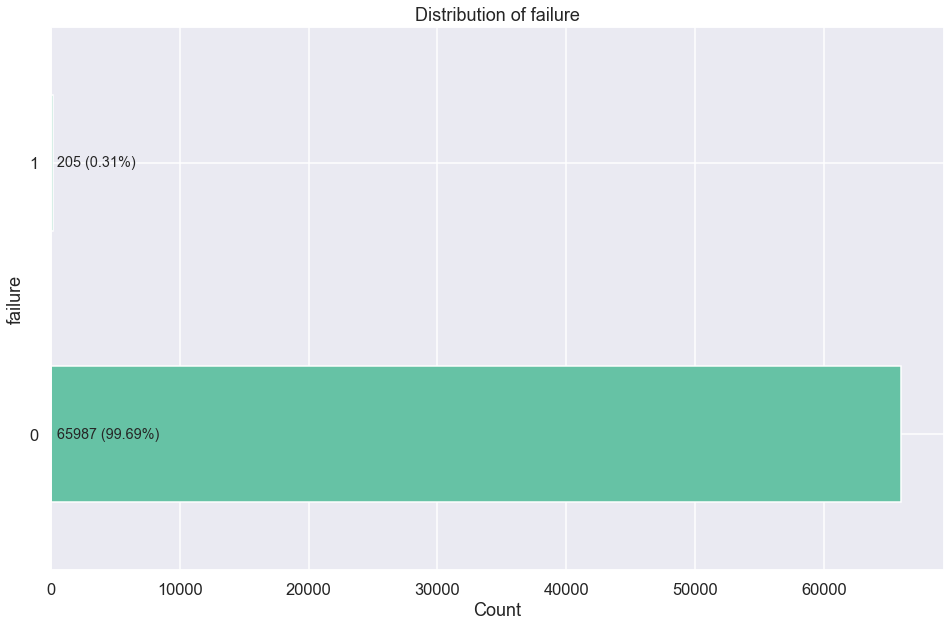

In [9]:
# Examine distribution of failure
ax = df.failure.value_counts().plot(kind='barh', figsize=(16,10))
[ax.text(500, i, '{} ({:.2f}%)'.format(v, v/len(df.failure)*100), va='center', fontsize='x-large') for i, v in enumerate(df.failure.value_counts())]
ax.set_xlabel('Count')
ax.set_ylabel('failure')
ax.set_title('Distribution of failure')
plt.show()

The percentage of failed widgets is very small compared to non-failures in the dataset. In most cases, classifiers are more sensitive to detecting the majority class and less sensitive to the minority class. During the modeling phase, we will first try training on the true distribution to determine if our classifier works well and generalizes. Next, we are going to try under-sampling the non-failure class or over-sampling the failure class to mitigate the biasness of the classification output.

We will be using precision, recall and F1 scores to evaluate the predictive performance of our classifiers. These evaluation metrics are less sensitive to imbalanced data as compared to using accuracy score.

In [10]:
# Examine breakdown of failure by model
def pct(x): return np.sum(x)/len(x)*100
with pd.option_context('display.max_rows', 70):
    display(pd.DataFrame(df.groupby(by='model').agg(['sum', 'count', pct]).failure.sort_values(by='sum',ascending=False)).rename(columns={'sum':'num_failure','count':'num_total','pct':'pct_failure'}))

,num_failure,num_total,pct_failure
model,,,
ST4000DM000,131,35185,0.372318
ST320LT007,15,88,17.045455
Hitachi HDS722020ALA330,13,4515,0.287929
WDC WD30EFRX,6,1078,0.556586
WDC WD800AAJS,6,20,30.000000
Hitachi HDS5C3030ALA630,5,4568,0.109457
Hitachi HDS5C4040ALE630,3,2642,0.113550
ST3160318AS,2,49,4.081633
WDC WD1600AAJB,2,8,25.000000


In [11]:
# Get number of models with less than 100 units in our dataset
len([i for i in df.model.value_counts() if i < 100])

51

ACME produces 69 widget models and 51 of them have less than 100 units manufactured in our data. The most popular model is ST4000DM000 with 35185 units manufactured, accounting for slightly over half of all widgets.

Regarding the 17 explanatory variables that begin with 'smart', it will be extremely helpful to have descriptions about their contents in order to determine any outliers or inconsistent values.

We are also going to assume that the smart values extracted from the mainframe are comparable across widget models.

## 3. Pre-processing and Modeling

---

### Pre-processing

For pre-processing, we are going to perform a 75-25 train/test split and scale our features.

### Modeling

To deal with imbalanced data, we are going to try the following modeling strategies:

- Training on the true distribution, i.e. without resampling
- Under-sampling the non-failure class on training data using random under-sampling
- Over-sampling the failure class on training data using the SMOTE algorithm which uses the nearest neighbors of observations to create synthetic data

For each strategy, we are going to test and evaluate the following classifiers:

- Logistic Regression
- Random Forests (Bagging Ensemble)
- AdaBoost (Boosting Ensemble)
- Support Vector Machine

### Evaluation metrics

To evaluate our models, we will use precision, recall and F1 scores.

- Precision: Proportion of actual failures among predicted failures. If we have a 100% precise model, this means the model could catch all widget failures (true positives) and there were no widgets that were wrongly flagged as failures (i.e. no false positives).
- Recall: Proportion of predicted failures among actual failures.  If we have a 100% recall model, this means the model did not miss any widget failures (true positives) and there were no widgets that were wrongly flagged as non-failures (i.e. no false negatives).
- F1: A weighted harmonic mean of the precision and recall. F1 score reaches its best value at 1 and worst at 0.

### Baseline model and score

For our baseline model, we will select our majority class of non-failures as the default result for all our predictions. In this case, our baseline scores will be:

Classifier|Precision|Recall|F1
-|-|-|-
Baseline|0|0|0

In [12]:
# Import libraries for pre-processing and modeling
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from pprint import pprint

In [13]:
# Set up X and y
X = df.drop(columns=['failure','model','date','serial_number'])
y = df['failure']

# Conduct 75-25 train/test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    stratify=y
                                                   )

In [14]:
class BaselineClassifier(BaseEstimator):
    """
    A baseline estimator that classifies every input into the zero class
    """
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
def cv_scores(estimator, X_train, y_train, n_folds, resampling=None):
    """
    Evaluate precision, recall and F1 scores by cross-validation. Dataset is split into k consecutive folds.
    Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
    Any resampling is applied only after validation sample has been removed from the training data.
    
    Parameters
    ----------
    estimator : estimator object implementing ‘fit’
        The object to use to fit the data.
    X_train : array-like
        The data to fit
    y_train : array-like
        The target variable to predict
    n_folds : int
        Number of folds
    resampling : string, [None (default), 'under', 'over']
        Determines if training fold is resampled before fitting the model. Possible inputs are:
            None : No resampling is done
            'under' : Performs under-sampling by randomly picking samples without replacement
            'over' : Performs over-sampling using SMOTE
    
    Returns
    -------
    dict
        A dictionary with precision, recall and F1 scores of each cross-validated run
    """
    skf = StratifiedKFold(n_splits=n_folds, random_state=42)
    rus = RandomUnderSampler(random_state=42)
    sm = SMOTE(random_state=42)
    
    # Split data into folds
    for train_index, test_index in skf.split(X_train, y_train):
        X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Apply resampling only to training fold set
        if resampling == 'under':
            X_to_train, y_to_train = rus.fit_resample(X_fold_train, y_fold_train)
        elif resampling == 'over':
            X_to_train, y_to_train = sm.fit_resample(X_fold_train, y_fold_train)
        else:
            X_to_train, y_to_train = X_fold_train, y_fold_train
        
        # Fit and predict
        estimator.fit(X_to_train, y_to_train)
        y_fold_pred = estimator.predict(X_fold_test)
        
        # Evaluate metrics
        scores = {'precision': [], 'recall': [], 'f1': []}
        scores['precision'].append(precision_score(y_fold_test, y_fold_pred))
        scores['recall'].append(recall_score(y_fold_test, y_fold_pred))
        scores['f1'].append(f1_score(y_fold_test, y_fold_pred))
    
    return(scores)

In [16]:
def model_scores(X_train, y_train, cv=5, resampling=None):
    """
    Evaluate precision, recall and F1 scores from cross-validation runs of 5 different
    classifiers (Baseline, Logistic Regression, Random Forests, AdaBoost and SVC)
    
    Parameters
    ----------
    X_train : array-like
        The data to fit
    y_train : array-like
        The target variable to predict
    cv : int (default=5)
        The number of folds for cross validation
    resampling : string, [None (default), 'under', 'over']
        Determines if training fold is resampled before fitting the model. Possible inputs are:
            None : No resampling is done
            'under' : Performs under-sampling by randomly picking samples without replacement
            'over' : Performs over-sampling using SMOTE

    Returns
    -------
    dict
        A dictionary with precision, recall and F1 scores of each classifier for all cross-validation runs
    """
    # Create pipelines for classifiers
    lr_pipe = Pipeline([
        ('sc', StandardScaler()),
        ('lr', LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=256))
    ])
    rf_pipe = Pipeline([
        ('sc', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
    ab_pipe = Pipeline([
        ('sc', StandardScaler()),
        ('ab', AdaBoostClassifier(random_state=42))
    ])
    svm_pipe = Pipeline([
        ('sc', StandardScaler()),
        ('svm', SVC(gamma='scale', random_state=42))
    ])
    
    # Obtain cross-validation scores
    scores = {'Baseline': {}, 'Logistic Regression': {}, 'Random Forests': {}, 'AdaBoost': {}, 'SVM': {}}
    scores['Baseline'] = cv_scores(BaselineClassifier(), X_train, y_train, cv, resampling)
    scores['Logistic Regression'] = cv_scores(lr_pipe, X_train, y_train, cv, resampling)
    scores['Random Forests'] = cv_scores(rf_pipe, X_train, y_train, cv, resampling)
    scores['AdaBoost'] = cv_scores(ab_pipe, X_train, y_train, cv, resampling)
    scores['SVM'] = cv_scores(svm_pipe, X_train, y_train, cv, resampling)
    
    return scores

### Without resampling

In [17]:
# Evaluate metrics by cross-validation
scores_td = model_scores(X_train, y_train, cv=5, resampling=None)

# Show all cross-validation scores to look for trends or anomalies
pprint(scores_td)

C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: 

{'AdaBoost': {'f1': [0.912280701754386],
              'precision': [0.9629629629629629],
              'recall': [0.8666666666666667]},
 'Baseline': {'f1': [0.0], 'precision': [0.0], 'recall': [0.0]},
 'Logistic Regression': {'f1': [0.0], 'precision': [0.0], 'recall': [0.0]},
 'Random Forests': {'f1': [0.8235294117647058],
                    'precision': [1.0],
                    'recall': [0.7]},
 'SVM': {'f1': [0.0], 'precision': [0.0], 'recall': [0.0]}}


C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Classifier,Precision,Recall,F1
0,Baseline,0.000000,0.000000,0.000000
1,Logistic Regression,0.000000,0.000000,0.000000
2,Random Forests,1.000000,0.700000,0.823529
3,AdaBoost,0.962963,0.866667,0.912281
4,SVM,0.000000,0.000000,0.000000


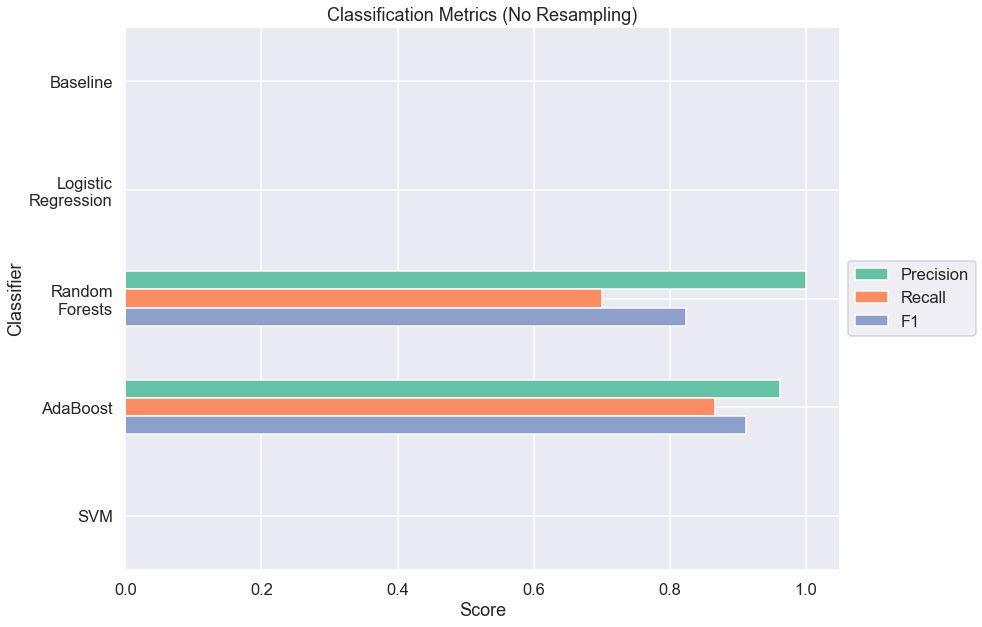

In [18]:
# Compute summary of cross-validation scores
precisions_td = [np.mean(scores_td[estimator]['precision']) for estimator in scores_td]
recalls_td = [np.mean(scores_td[estimator]['recall']) for estimator in scores_td]
f1s_td = [np.mean(scores_td[estimator]['f1']) for estimator in scores_td]
df_td = pd.DataFrame(data={'Classifier': list(scores_td.keys()), 'Precision': precisions_td, 'Recall': recalls_td, 'F1': f1s_td})
display(df_td)

# Plot summary of mean cross-validation scores
ax = df_td.plot(kind='barh', figsize=(16,10))
ax.set_ylabel('Classifier')
ax.set_xlabel('Score')
ax.set_yticklabels(list(map(lambda x: x.replace(' ', '\n'), scores_td.keys())), rotation=0)
ax.set_title('Classification Metrics (No Resampling)')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.show()

Without resampling, our Random Forests and AdaBoost models work relatively well, where precision is one or very close to one, i.e. all or almost all identified failures are actual failures. However, we would like to try resampling our training data to see if we could do better for recall.

### With under-sampling

In [19]:
# Evaluate metrics by cross-validation
scores_us = model_scores(X_train, y_train, cv=5, resampling='under')

# Show all cross-validation scores to look for trends or anomalies
pprint(scores_us)

C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: 

{'AdaBoost': {'f1': [0.47619047619047616],
              'precision': [0.3125],
              'recall': [1.0]},
 'Baseline': {'f1': [0.0], 'precision': [0.0], 'recall': [0.0]},
 'Logistic Regression': {'f1': [0.018830525272547076],
                         'precision': [0.009557344064386318],
                         'recall': [0.6333333333333333]},
 'Random Forests': {'f1': [0.5178571428571428],
                    'precision': [0.35365853658536583],
                    'recall': [0.9666666666666667]},
 'SVM': {'f1': [0.02564102564102564],
         'precision': [0.013059701492537313],
         'recall': [0.7]}}


,Classifier,Precision,Recall,F1
0,Baseline,0.000000,0.000000,0.000000
1,Logistic Regression,0.009557,0.633333,0.018831
2,Random Forests,0.353659,0.966667,0.517857
3,AdaBoost,0.312500,1.000000,0.476190
4,SVM,0.013060,0.700000,0.025641


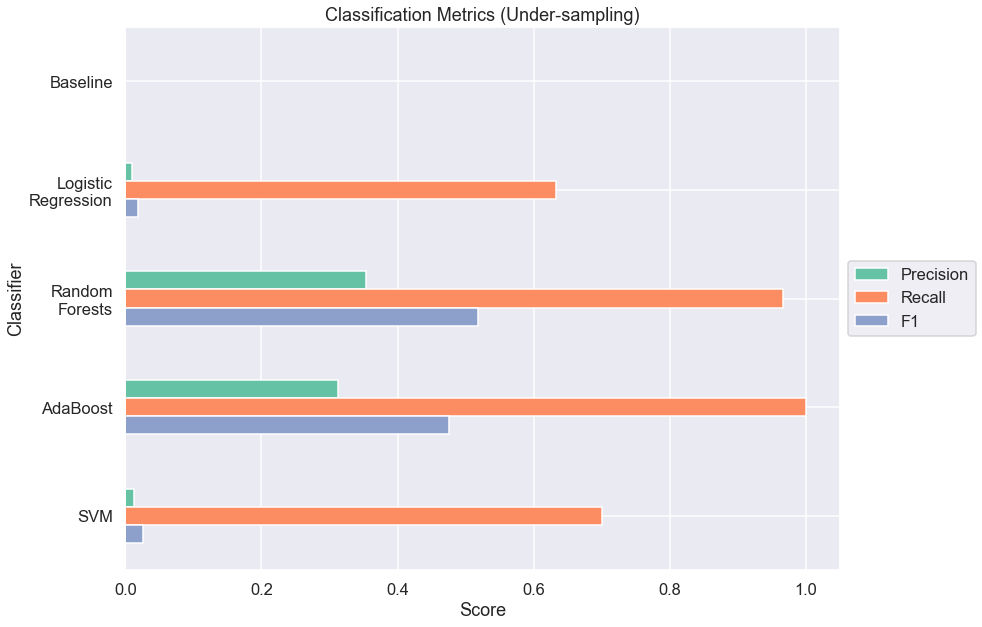

In [20]:
# Compute summary of cross-validation scores
precisions_us = [np.mean(scores_us[estimator]['precision']) for estimator in scores_us]
recalls_us = [np.mean(scores_us[estimator]['recall']) for estimator in scores_us]
f1s_us = [np.mean(scores_us[estimator]['f1']) for estimator in scores_us]
df_us = pd.DataFrame(data={'Classifier': list(scores_us.keys()), 'Precision': precisions_us, 'Recall': recalls_us, 'F1': f1s_us})
display(df_us)

# Plot summary of mean cross-validation scores
ax = df_us.plot(kind='barh', figsize=(16,10))
ax.set_ylabel('Classifier')
ax.set_xlabel('Score')
ax.set_yticklabels(list(map(lambda x: x.replace(' ', '\n'), scores_us.keys())), rotation=0)
ax.set_title('Classification Metrics (Under-sampling)')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.show()

By under-sampling, we increased the recall of our models but at the huge expense of precision. We might have thrown away potentially useful information by discarding samples.

### With over-sampling

In [21]:
# Evaluate metrics by cross-validation
scores_os = model_scores(X_train, y_train, cv=5, resampling='over')

# Show all cross-validation scores to look for trends or anomalies
pprint(scores_os)

C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Yufung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: 

{'AdaBoost': {'f1': [0.8923076923076922],
              'precision': [0.8285714285714286],
              'recall': [0.9666666666666667]},
 'Baseline': {'f1': [0.0], 'precision': [0.0], 'recall': [0.0]},
 'Logistic Regression': {'f1': [0.03343166175024582],
                         'precision': [0.017223910840932118],
                         'recall': [0.5666666666666667]},
 'Random Forests': {'f1': [0.896551724137931],
                    'precision': [0.9285714285714286],
                    'recall': [0.8666666666666667]},
 'SVM': {'f1': [0.030878859857482188],
         'precision': [0.01600985221674877],
         'recall': [0.43333333333333335]}}


,Classifier,Precision,Recall,F1
0,Baseline,0.000000,0.000000,0.000000
1,Logistic Regression,0.017224,0.566667,0.033432
2,Random Forests,0.928571,0.866667,0.896552
3,AdaBoost,0.828571,0.966667,0.892308
4,SVM,0.016010,0.433333,0.030879


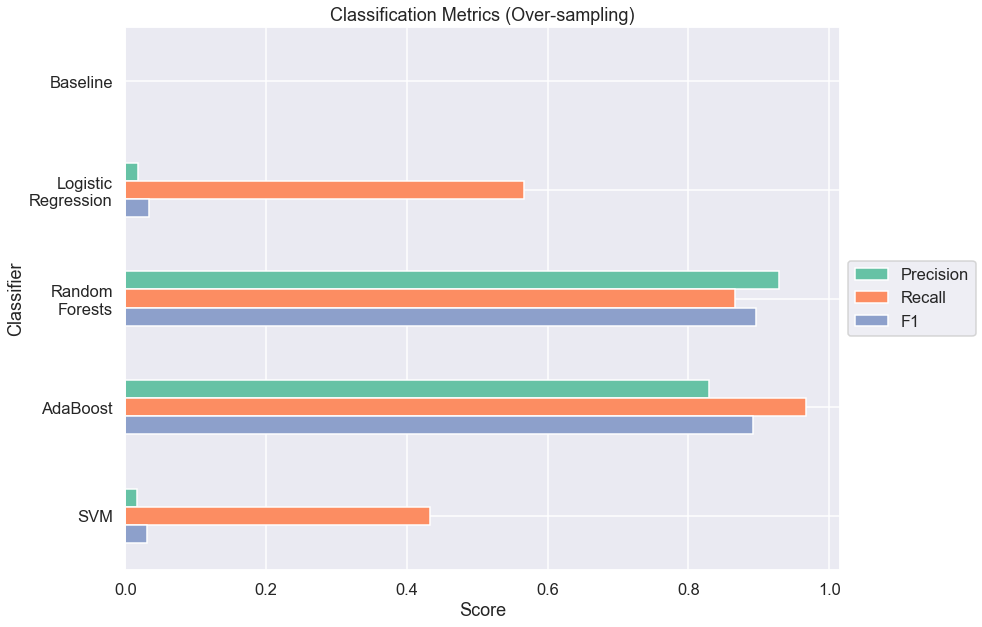

In [22]:
# Compute summary of cross-validation scores
precisions_os = [np.mean(scores_os[estimator]['precision']) for estimator in scores_os]
recalls_os = [np.mean(scores_os[estimator]['recall']) for estimator in scores_os]
f1s_os = [np.mean(scores_os[estimator]['f1']) for estimator in scores_os]
df_os = pd.DataFrame(data={'Classifier': list(scores_os.keys()), 'Precision': precisions_os, 'Recall': recalls_os, 'F1': f1s_os})
display(df_os)

# Plot summary of mean cross-validation scores
ax = df_os.plot(kind='barh', figsize=(16,10))
ax.set_ylabel('Classifier')
ax.set_xlabel('Score')
ax.set_yticklabels(list(map(lambda x: x.replace(' ', '\n'), scores_os.keys())), rotation=0)
ax.set_title('Classification Metrics (Over-sampling)')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().invert_yaxis()
plt.show()

Similar to model training without resampling, our Random Forests and AdaBoost models work relatively well with over-sampling using SMOTE.

### Choosing a final model

Our shortlisted models are:

- Random Forests without resampling
- AdaBoost without resampling
- Random Forests with over-sampling
- AdaBoost with over-sampling

Model|Precision|Recall|F1
-|-|-|-
Random Forests without resampling|1.000000|0.791613|0.882601
AdaBoost without resampling|0.956577|0.883011|0.918028
Random Forests with over-sampling|0.957635|0.876559|0.915243
AdaBoost with over-sampling|0.794647|0.967527|0.870570

Our choice of model will depend on ACME's business requirement and tolerance to false negatives and false positives.

1. If falsely predicting a widget failure when there is none can be a problem due to loss of time and resources to address a falsely predicted failure, then we should choose Random Forests without resampling as our final model which has the highest precision.


2. If failure to predict a widget failure is detrimental or very expensive, then we should choose AdaBoost with over-sampling which has the highest recall.


3. If both failure to predict and wrongly predicting widget failures are important considerations for ACME, AdaBoost without resampling would be our choice which has the highest F1 score.

For the rest of our analysis, we will assume that both precision and recall are important to ACME and choose AdaBoost without resampling as our final model.

### Hyperparameter tuning

In [23]:
# Tune hyperparameters for AdaBoost that maximizes F1 score
ab_pipe = Pipeline([
        ('sc', StandardScaler()),
        ('ab', AdaBoostClassifier(random_state=42))
])
gs_params = {
    'ab__n_estimators': range(150,171,5),
    'ab__learning_rate': np.linspace(0.01, 1, 20)
}
gs_ab = GridSearchCV(ab_pipe, gs_params, scoring='f1', cv=5, n_jobs=-1, iid=False, verbose=1)
gs_ab.fit(X_train, y_train)
print('Parameter setting: {}\nMean cross-validated F1 score: {}'.format(gs_ab.best_params_, gs_ab.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.3min finished


Parameter setting: {'ab__learning_rate': 0.8957894736842106, 'ab__n_estimators': 160}
Mean cross-validated F1 score: 0.9352795715323318


## 4. Evaluation

---

In [24]:
# Evaluate model on test set
y_pred = gs_ab.predict(X_test)

# Show confusion matrix
display(pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=['predict non-failure', 'predict failure'],
            index=['actual non-failure', 'actual failure']))

# Show metrics
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Recall:    {}'.format(recall_score(y_test, y_pred)))
print('F1:        {}'.format(f1_score(y_test, y_pred)))

,predict non-failure,predict failure
actual non-failure,16496,1
actual failure,1,50


Precision: 0.9803921568627451
Recall:    0.9803921568627451
F1:        0.9803921568627451


Our final model performed relatively well on our holdout test data. Both precison and recall are very close to 1 - We falsely predicted 1 failed widget as a non-failure, and 1 functional widget as a failure.

However, as widget model ST4000DM000 is overrepresented in our dataset, it is possible that our prediction model may not generalize perfectly to other widget models. Nevertheless, our result does indicate the potential effectiveness of predicting widget failure using smart values.

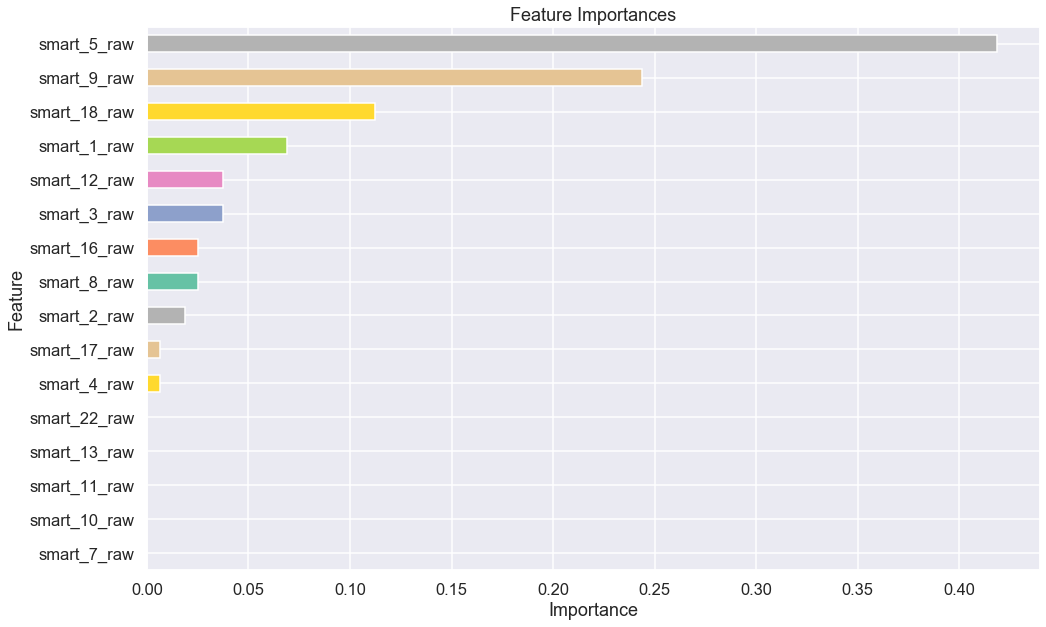

In [25]:
# Get feature importances from best model
df_imp = pd.DataFrame(data={'importance': gs_ab.best_estimator_.named_steps.ab.feature_importances_}, index=X.columns)

# Plot feature importances
df_imp.sort_values(by='importance').plot(kind='barh', figsize=(16,10), color=[sns.mpl_palette("Set2", 8)])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend().remove()
plt.show()

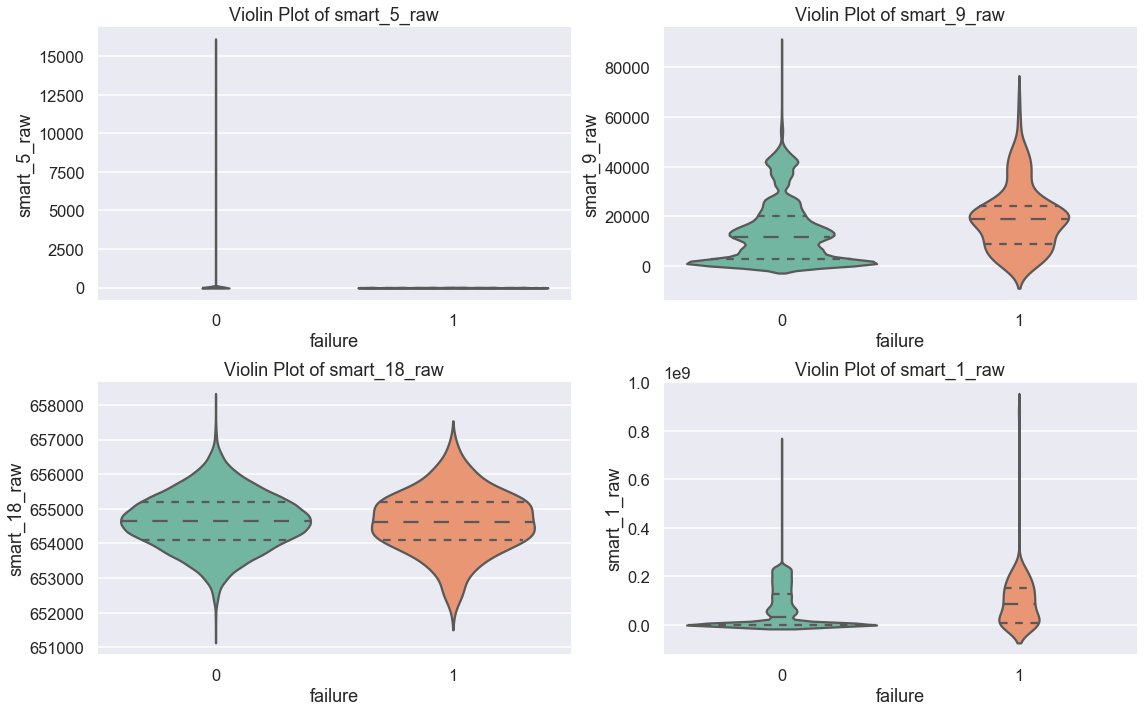

In [26]:
# Violinplot of important features across prediction classes
var = ['smart_5_raw', 'smart_9_raw', 'smart_18_raw', 'smart_1_raw']
fig = plt.figure(figsize=(16,10))
for i, v in enumerate(var):
    plt.subplot(2,2,i+1)
    sns.violinplot(x='failure', y=v, data=df, inner='quartile')
    plt.title('Violin Plot of {}'.format(v))
plt.tight_layout()

From our model, we find that these 4 features are strong predictors of widget failure:

- *smart_5_raw*: Most widgets that failed appear to have a lower value
- *smart_9_raw*: Most widgets that failed appear to have a higher value
- *smart_18_raw*: We could not interpret any obvious relationship from the plot
- *smart_1_raw*: Most widgets that failed appear to have a higher value

## 5. Conclusion and Recommendations

---

### Conclusion
- Our AdaBoost classifier trained without resampling performed well in predicting widget failure with test F1 score of 0.98. We gave equal importance to precision and accuracy while tuning our model.
- Strong predictors of widget failure are *smart_5_raw*, *smart_9_raw*, *smart_18_raw* and *smart_1_raw*.

### Recommendations
- If the 17 smart values are known and collected during manufacturing, our failure prediction model can be used to augment current quality control processes and remove widgets that are likely to fail soon. During model testing, we successfully predicted 98% of failures, and 98% of all predicted failures are actual failures.
- If the 17 smart values are only known after the widgets are used, our failure prediction model can be used as an early warning system by sending user alerts if it detects that a widget may fail soon.
- Examine factors that may affect *smart_5_raw*, *smart_9_raw*, *smart_18_raw* and *smart_1_raw* values, which are strong predictors of widget failure. Develop prevention strategies that will keep these values within the norminal range for non-failures.

### Limitations
- While we believe that the smart values reported from the mainframe are comparable across widget models, ST4000DM000 is overrepresented in our dataset. It is important to test our prediction model on larger numbers of other widget models to monitor its predictive performance.
- With limited descriptions provided for the 17 explanatory variables that begin with 'smart', we did not manage to explore feature selection, feature engineering, or consider any interactions between features.
- To better understand what causes failures of widgets, it will be good to have repeated observations of functional and failed widgets over a time period. We can then examine the difference in a smart value between time T and T−1 to predict failure.